<a href="https://colab.research.google.com/github/HB-VM/vm/blob/master/exploration_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Analysis with Ford GoBike Data


## Overview

 
in this project, I will perform an exploratory analysis of data provided by Ford GoBike, a bike-share system provider.


 

In [1]:
# Import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Download the dataset with pandas *From burakgunbatan GitHub*
folder_name_of_csvs = 'pf4'

makedirs(folder_name_of_csvs)
pd.read_csv('https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv').to_csv('{}/2017-forgobike-tripdata.csv'.format(folder_name_of_csvs))
for month in range(1,12):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)
        
    # Code below opens zip file; BytesIO returns a readable and writable view of the contents
    unzipped_file = ZipFile(BytesIO(response.content))
        
    # Extracted the zip file into folder trip_data_files
    unzipped_file.extractall(folder_name_of_csvs)

In [0]:
# Merge all locally saved CSVs into One DataFrame
all_files = []
for file_name in listdir(folder_name_of_csvs):
    all_files.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
dataFrame = pd.concat(all_files)

In [0]:
# Save DataFram to data.csv
dataFrame.to_csv('mergeData.csv')

In [0]:
# Examine DataFrame
dataFrame = pd.read_csv('mergeData.csv')

In [6]:
len(dataFrame)

2252058

Text(0.5, 0, 'Age bike riders')

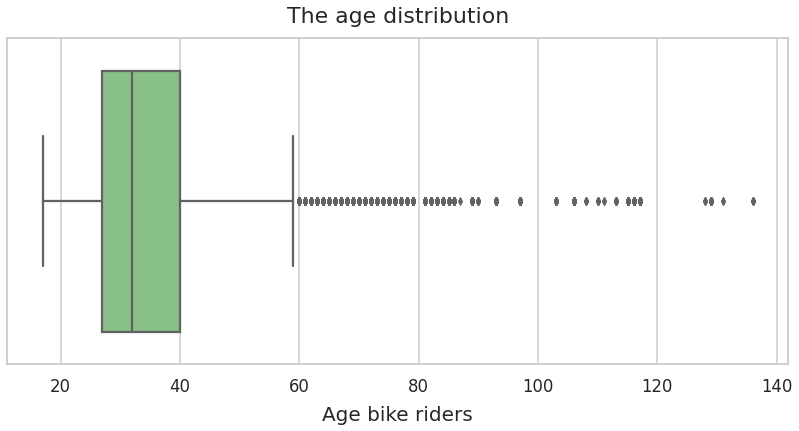

In [8]:
# Set visualization style
sns.set_style('whitegrid')
sns.set_context("talk")

# Filter data to include reasonable member age range
dataFrame['member_age'] = 2017-dataFrame['member_birth_year']

plt.figure(figsize=(14,6))
sns.boxplot(x='member_age', data=dataFrame, palette='Accent', orient='h')
plt.title("The age distribution", fontsize=22, y=1.03)
plt.xlabel("Age bike riders", fontsize=20, labelpad=10)

In [0]:
dataFrame = dataFrame[dataFrame['member_age']<=55]

In [10]:
dataFrame['member_age'].mean()

33.21407058728663

In [0]:
# Filter data only to include India rides
max_longitude_europe = -122.3597
min_longitude_europe= -122.5147
max_latitude_europe = 37.8121
min_latitude_europe = 37.7092

In [0]:
end_station_latitude_mask = (dataFrame['end_station_latitude']>=min_latitude_europe) & (dataFrame['end_station_latitude']<=max_latitude_europe)
start_station_latitude_mask = (dataFrame['start_station_latitude']>=min_latitude_europe) & (dataFrame['start_station_latitude']<=max_latitude_europe)

end_station_longitude_mask =(dataFrame['end_station_longitude']>=min_longitude_europe) & (dataFrame['end_station_longitude']<=max_longitude_europe)
start_station_longitude_mask = (dataFrame['start_station_longitude']>=min_longitude_europe) & (dataFrame['start_station_longitude']<=max_longitude_europe)

In [0]:
dataFrame = dataFrame[end_station_latitude_mask & start_station_latitude_mask & end_station_longitude_mask & start_station_longitude_mask]

In [14]:
len(dataFrame)

1467591

In [15]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467591 entries, 0 to 2252056
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Unnamed: 0               1467591 non-null  int64  
 1   duration_sec             1467591 non-null  int64  
 2   start_time               1467591 non-null  object 
 3   end_time                 1467591 non-null  object 
 4   start_station_id         1467591 non-null  float64
 5   start_station_name       1467591 non-null  object 
 6   start_station_latitude   1467591 non-null  float64
 7   start_station_longitude  1467591 non-null  float64
 8   end_station_id           1467591 non-null  float64
 9   end_station_name         1467591 non-null  object 
 10  end_station_latitude     1467591 non-null  float64
 11  end_station_longitude    1467591 non-null  float64
 12  bike_id                  1467591 non-null  int64  
 13  user_type                1467591 non-null 

> Now the data size became around (1467591) from (2252058).


### What is the structure of your dataset?

> There is 1467591 trip in the dataset with 19 columns, and different variable types like (int - float - string - bool) but the most type are numeric.

### What is/are the main feature(s) of interest in your dataset?

- Gender  
- Average riding duration  
- Average riding distance  
- Age groups of users 

 

## univariate Exploration

In [0]:
# Create new fields for date from start_time and end_time
dataFrame['start_time'] = pd.to_datetime(dataFrame['start_time'])
dataFrame['end_time'] = pd.to_datetime(dataFrame['end_time'])

dataFrame['start_time_date'] = dataFrame['start_time'].dt.date
dataFrame['end_time_date'] = dataFrame['end_time'].dt.date

dataFrame['start_time_year_month'] = dataFrame['start_time'].map(lambda x: x.strftime('%Y-%m'))
dataFrame['end_time_year_month'] = dataFrame['end_time'].map(lambda x: x.strftime('%Y-%m'))

dataFrame['start_time_year_month_renamed'] = dataFrame['start_time'].dt.strftime('%y' + '-' + '%m')

dataFrame['start_time_year'] = dataFrame['start_time'].dt.year.astype(int)
dataFrame['end_time_year'] = dataFrame['end_time'].dt.year.astype(int)

dataFrame['start_time_month'] = dataFrame['start_time'].dt.month.astype(int)
dataFrame['end_time_month'] = dataFrame['end_time'].dt.month.astype(int)

dataFrame['start_time_hour_minute'] = dataFrame['start_time'].map(lambda x: x.strftime('%H-%m'))
dataFrame['end_time_hour_minute'] = dataFrame['end_time'].map(lambda x: x.strftime('%H-%m'))

dataFrame['start_time_hour'] = dataFrame['start_time'].dt.hour
dataFrame['end_time_hour'] = dataFrame['end_time'].dt.hour


dataFrame['start_time_weekday_abbr'] = dataFrame['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
dataFrame['end_time_weekday_abbr'] = dataFrame['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

# Create a new field for member age group from member_age_bin
dataFrame['member_age_bins'] = dataFrame['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

# Create minutes for trip duration from duration_sec
dataFrame['duration_min'] = dataFrame['duration_sec']/60

# Create new fields for distance
def distance(origin, destination):
    firstLat, firstlon = origin
    secondistanceLat, secondistanceLon = destination
    radiusValue = 6371

    distanceLat = math.radians(secondistanceLat - firstLat)
    distanceLon = math.radians(secondistanceLon - firstlon)
    firstValue = (math.sin(distanceLat / 2) * math.sin(distanceLat / 2) +
         math.cos(math.radians(firstLat)) * math.cos(math.radians(secondistanceLat)) *
         math.sin(distanceLon / 2) * math.sin(distanceLon / 2))
    secondValue = 2 * math.atan2(math.sqrt(firstValue), math.sqrt(1 - firstValue))
    result = radiusValue * secondValue

    return result
	
dataFrame['distance_km_estimates'] = dataFrame.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
dataFrame['distance_miles_estimates'] = dataFrame['distance_km_estimates']*0.621371

### average count of rides per bike per day


In [0]:
count_rides = dataFrame.groupby('start_time_year_month_renamed')['bike_id'].size().reset_index()
count_unique_rides = dataFrame.groupby('start_time_year_month_renamed')['bike_id'].nunique().reset_index().rename(columns={'bike_id':'unique_bike_id'})
count_rides_dataFrame = count_rides.merge(count_unique_rides, on='start_time_year_month_renamed')
count_rides_dataFrame['number_of_used'] = count_rides_dataFrame['bike_id']/count_rides_dataFrame['unique_bike_id']
Aug_2016_AVG_BikeUsed = (count_rides_dataFrame[count_rides_dataFrame['start_time_year_month_renamed']=='17-09']['number_of_used'].mean())/31
Aug_2017_AVG_BikeUsed = (count_rides_dataFrame[count_rides_dataFrame['start_time_year_month_renamed']=='18-09']['number_of_used'].mean())/31


In [19]:
print(Aug_2016_AVG_BikeUsed, Aug_2017_AVG_BikeUsed)

1.282412863277739 2.3859412029692306


In [20]:
print(Aug_2017_AVG_BikeUsed/Aug_2016_AVG_BikeUsed)

1.8605094126013104


### Count of daily bike rides from July 2017 to November 2018

In [0]:
def transform_axis(dailyBike, pos):
    if dailyBike >= 1000:
        value = int(dailyBike/1000)
        return '{:d}K'.format(value)
    elif dailyBike >= 1000000: 
        value = int(dailyBike/1000000)
        return '{:d}M'.format(value)
    else:
        return int(dailyBike)

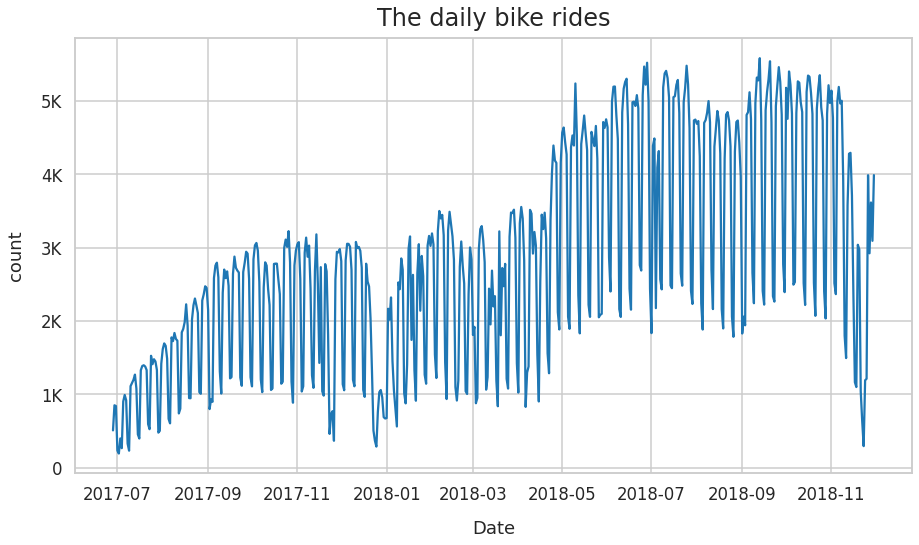

In [22]:
dataFrame.groupby('start_time_date').agg({'bike_id':'count'}).plot(style='-', legend=False, figsize=(15,8))
plt.title('The daily bike rides', fontsize=24, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('count', labelpad=16)
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))

### Count of people who took bike rides by age group per month

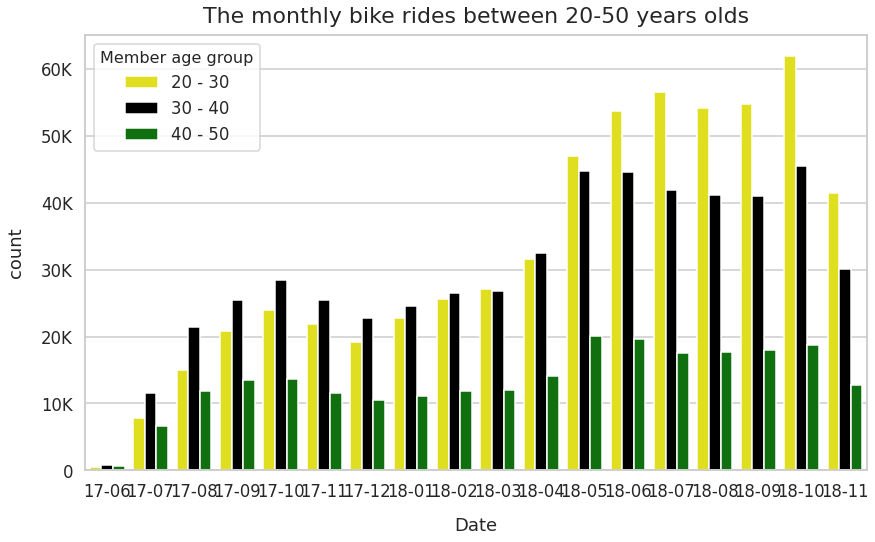

In [23]:
plt.figure(figsize=(14,8))
palette = {'20 - 30': 'yellow', '30 - 40': 'black', '40 - 50': 'green'}
axis = sns.countplot(x='start_time_year_month_renamed', hue='member_age_bins', palette=palette, data=dataFrame[dataFrame['member_age_bins'].isin(['20 - 30', '30 - 40', '40 - 50'])].sort_values(by=['start_time_year_month_renamed', 'member_age_bins']))
plt.title('The monthly bike rides between 20-50 years olds', fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('count', labelpad=16)
leg = axis.legend()
leg.set_title('Member age group',prop={'size':16})
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))

### Bike rides per gender

(0.0, 100.0)

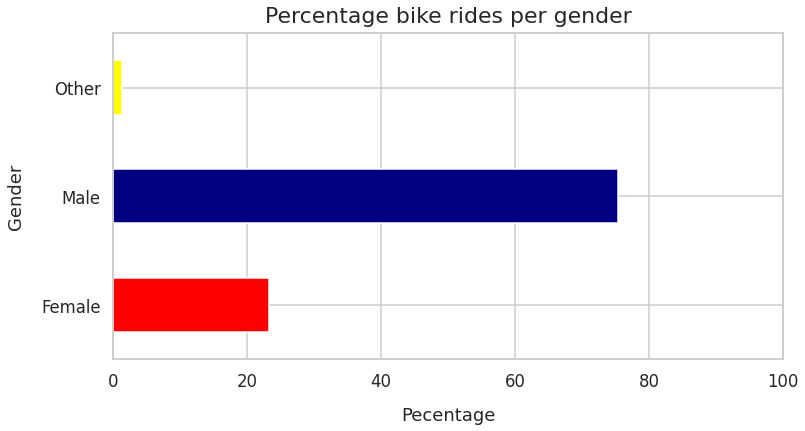

In [24]:
gender_trips = dataFrame.groupby('member_gender').agg({'bike_id':'count'})
gender_trips['perc'] = (gender_trips['bike_id']/gender_trips['bike_id'].sum())*100

colors = ['red', 'navy', 'yellow']
gender_trips['perc'].plot(kind='barh', color=colors, figsize=(12,6))
plt.title('Percentage bike rides per gender', fontsize=22, y=1.015)
plt.ylabel('Gender', labelpad=16)
plt.xlabel('Pecentage', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)

> Male took around %76 of all bike rides, and female took around %22 of them.

## Bivariate Exploration

### User trends of bike rides of subscribers vs customers

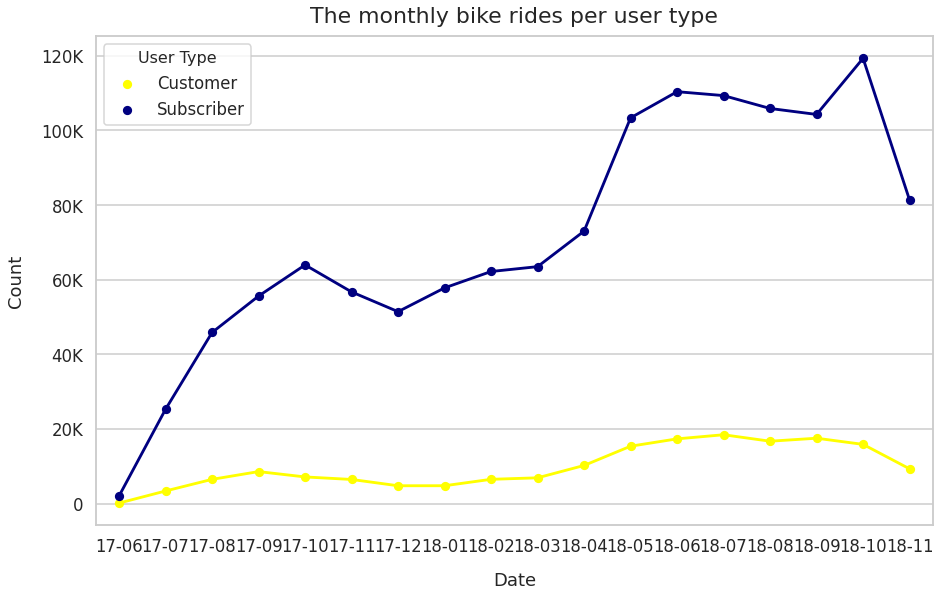

In [25]:
user_type_count = dataFrame.groupby(["start_time_year_month_renamed", "user_type"]).size().reset_index()

plt.figure(figsize=(15,9))
palette = {'Subscriber':'navy', 'Customer':'yellow'}
axis = sns.pointplot(x='start_time_year_month_renamed', y=0, hue='user_type', palette=palette, scale=.7, data=user_type_count)
plt.title('The monthly bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('Count', labelpad=16)
leg = axis.legend()
leg.set_title('User Type',prop={'size':16})
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))


**Customers' rides seem increasing slightly.**

**But there is a decrease in November 2018 for subscribers but it seems like it is related with the winter season.**

### Average trip duration of subscribers vs customers

Text(0.5, 0, 'trip duration in minutes')

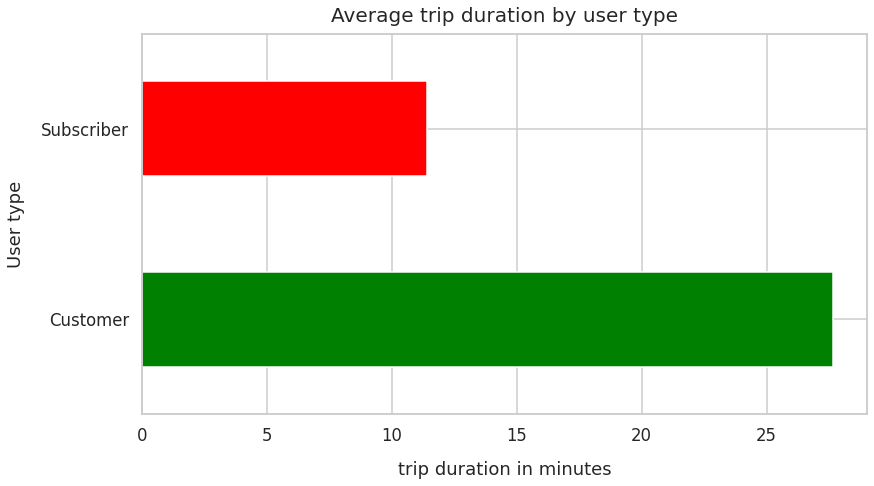

In [26]:
colors=['green', 'red']
axis = dataFrame.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=colors, figsize=(13,7))
axis.set_title('Average trip duration by user type', fontsize=20, y=1.015)
axis.set_ylabel('User type', labelpad=16)
axis.set_xlabel('trip duration in minutes', labelpad=16)

**Subscribers' average trip duration is ~ 11 minutes.**

**Customers' average trip duration is ~ 28 minutes.**

### The trend of subscribers' bike rides per age group

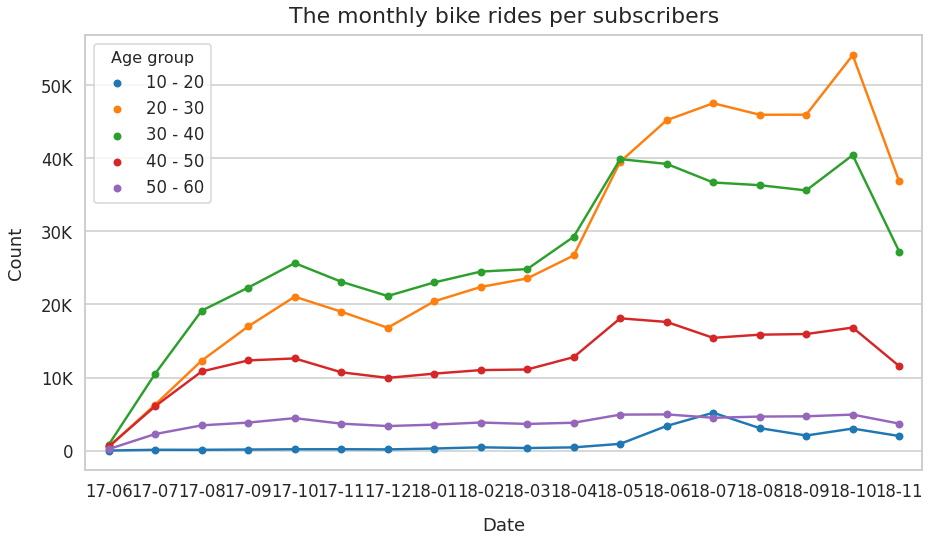

In [27]:
subscriber_age = dataFrame[dataFrame['user_type']=='Subscriber'].groupby(['start_time_year_month_renamed', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

plt.figure(figsize=(15,8))
axis = sns.pointplot(x='start_time_year_month_renamed', y='bike_id', hue='member_age_bins', scale=.6, data=subscriber_age)
plt.title("The monthly bike rides per subscribers", fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('Count', labelpad=16)
leg = axis.legend()
leg.set_title('Age group',prop={'size':16})
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))


**As we can see from the chart of the participants there is a convergence between the age groups (20-30) and (30-40), the same applies to the age categories (40-50) and (50-60), while the category (10-20) is considered Least among the age groups.**

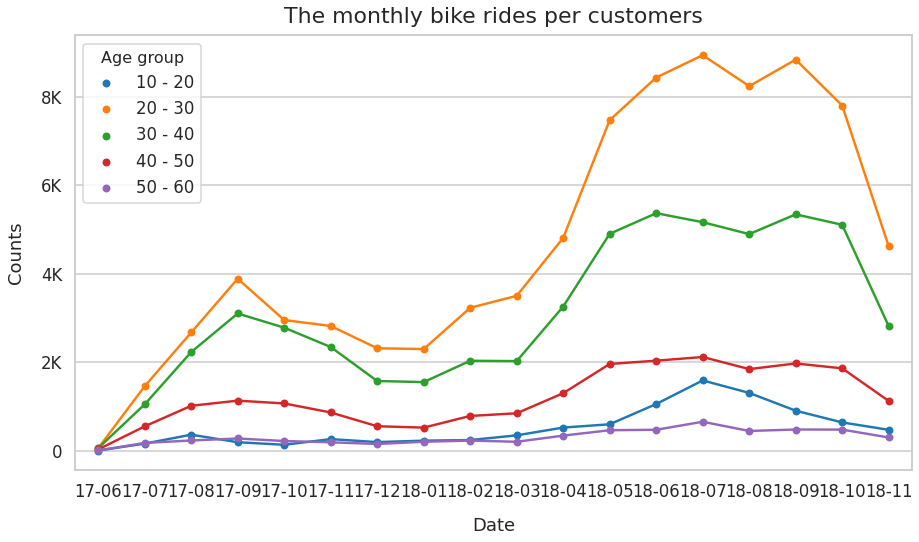

In [28]:
customer_age = dataFrame[dataFrame['user_type']=='Customer'].groupby(['start_time_year_month_renamed', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()

plt.figure(figsize=(15,8))
axis = sns.pointplot(x='start_time_year_month_renamed', y='bike_id', hue='member_age_bins', scale=.6, data=customer_age)
plt.title("The monthly bike rides per customers", fontsize=22, y=1.015)
plt.xlabel('Date', labelpad=16)
plt.ylabel('Counts', labelpad=16)
legs = axis.legend()
legs.set_title('Age group',prop={'size':16})
axis = plt.gca()
axis.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis))


**As we can see from the chart of the participants there is a convergence between the age groups (20-30) and (30-40), but the age categories (40-50) is less than previous categories, while the category (10-20) and (50-60)  is considered Least among the age groups.**

### Which age group would prefer electric biking more.

**We know that the company launched the bicycle project on (April 24th, 2018) assume that electric bikes were added in the same week.**

In [29]:
nonelectric_bike = dataFrame[dataFrame['start_time'] < pd.Timestamp(2018,4,24)]['bike_id'].unique()

electric_bike = []
for bike_id in dataFrame[(dataFrame['start_time'] > pd.Timestamp(2018, 4, 24)) & (dataFrame['start_time'] < pd.Timestamp(2018, 5, 24))]['bike_id']: 
    if bike_id not in nonelectric_bike and bike_id not in electric_bike:
        electric_bike.append(bike_id)
		
len(electric_bike)

313

**Electric bike rides vs regular bike ride for the first month.**

In [30]:
dataFrame['electric_bike'] = dataFrame['bike_id'].isin(electric_bike)
(dataFrame['electric_bike'].value_counts()/dataFrame['electric_bike'].value_counts().sum())*100

False    91.908645
True      8.091355
Name: electric_bike, dtype: float64

> Results:
- 91.9% of rides are non-electric bike rides.
- 8.1% of rides are electric bike rides.

**There is a big difference between electric bike and regular bike riding.**

## Multivariate Exploration


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text major ticklabel objects>)

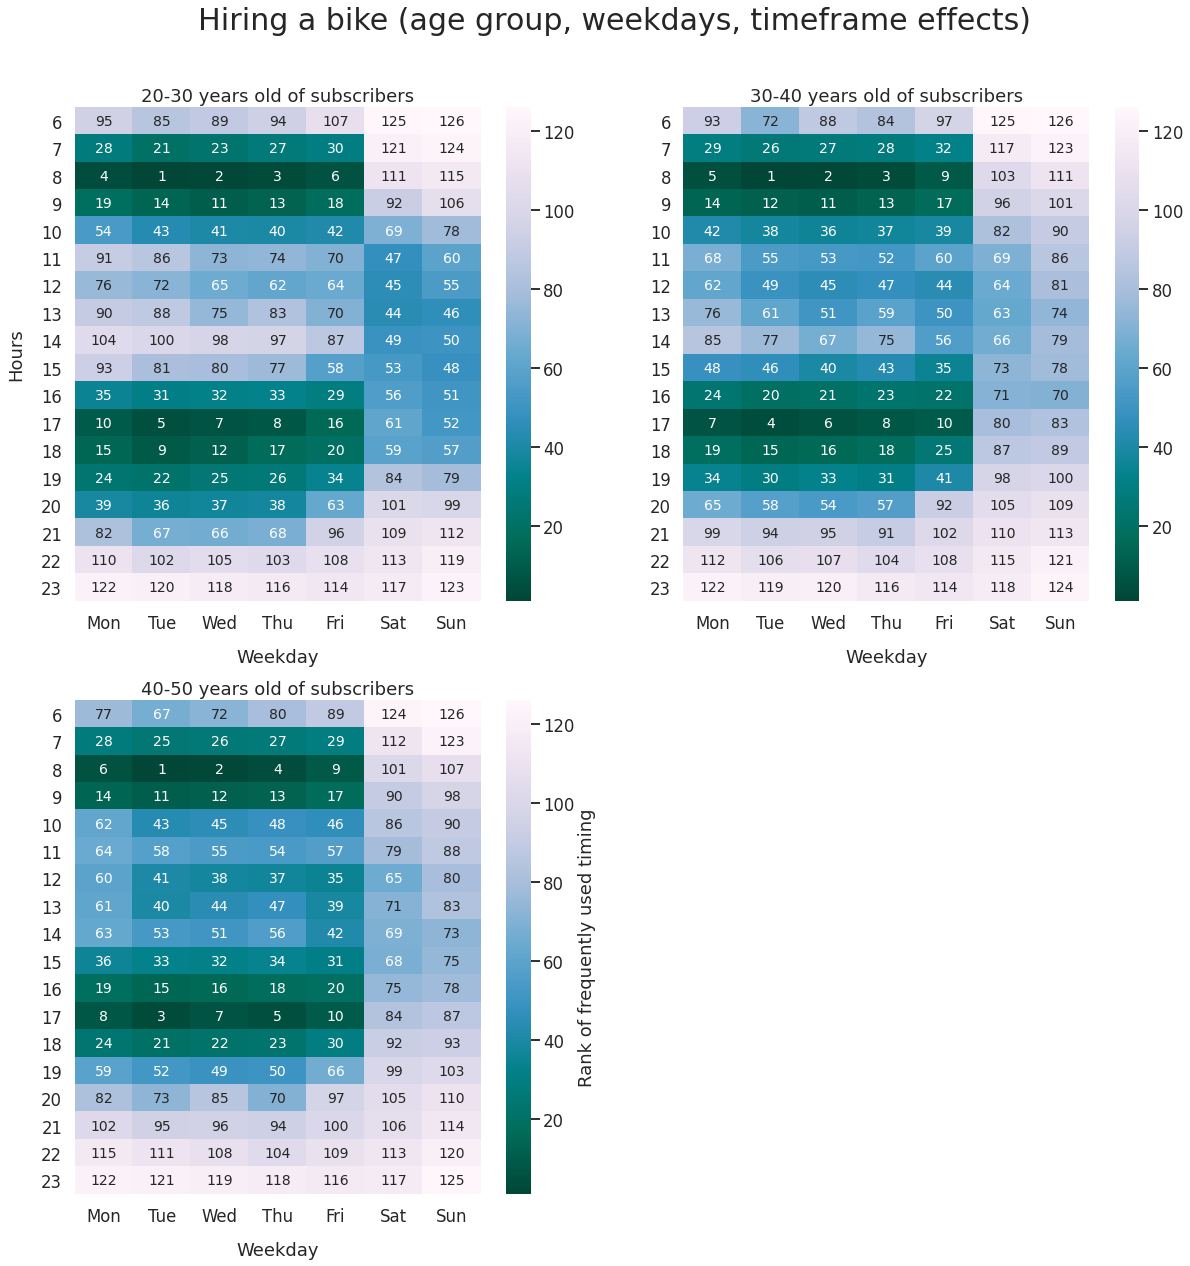

In [33]:
subscriber_hour_dataFrame = dataFrame[(dataFrame['member_age']>=20) & (dataFrame['member_age']<40) 
                              &(dataFrame['start_time_hour']>5)&(dataFrame['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()
subscriber_hour_2 = dataFrame[(dataFrame['member_age']>=20) & (dataFrame['member_age']<30) 
                              &(dataFrame['start_time_hour']>5)&(dataFrame['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

subscriber_hour_3 = dataFrame[(dataFrame['member_age']>=30) & (dataFrame['member_age']<40) 
                              &(dataFrame['start_time_hour']>5)&(dataFrame['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

subscriber_hour_4 = dataFrame[(dataFrame['member_age']>=40) & (dataFrame['member_age']<50) 
                              &(dataFrame['start_time_hour']>5)&(dataFrame['user_type']=='Subscriber')
                             ].groupby(['start_time_weekday_abbr', 'start_time_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

subscriber_hour_2['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_2['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

subscriber_hour_3['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_3['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

subscriber_hour_4['start_time_weekday_abbr'] = pd.Categorical(subscriber_hour_4['start_time_weekday_abbr'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

subscriber_hour_2['count_perc'] = subscriber_hour_2['count'].apply(lambda x: (x/subscriber_hour_dataFrame['count'].sum())*100)

subscriber_hour_3['count_perc'] = subscriber_hour_3['count'].apply(lambda x: (x/subscriber_hour_dataFrame['count'].sum())*100)

subscriber_hour_4['count_perc'] = subscriber_hour_4['count'].apply(lambda x: (x/subscriber_hour_dataFrame['count'].sum())*100)

subscriber_hour_2['rank'] = subscriber_hour_2['count_perc'].rank(ascending=False).astype(int)

subscriber_hour_3['rank'] = subscriber_hour_3['count_perc'].rank(ascending=False).astype(int)

subscriber_hour_4['rank'] = subscriber_hour_4['count_perc'].rank(ascending=False).astype(int)

subscriber_hour_dataFrame_pivoted2 = subscriber_hour_2.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

subscriber_hour_dataFrame_pivoted3 = subscriber_hour_3.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')

subscriber_hour_dataFrame_pivoted4 = subscriber_hour_4.pivot_table(index='start_time_hour', columns='start_time_weekday_abbr', values='rank')


plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle('Hiring a bike (age group, weekdays, timeframe effects)', fontsize=30, y=0.95)
sns.heatmap(subscriber_hour_dataFrame_pivoted2, fmt='d', annot=True, cmap='PuBuGn_r', annot_kws={"size": 14})
plt.title("20-30 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hours', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(subscriber_hour_dataFrame_pivoted3, fmt='d', annot=True, cmap='PuBuGn_r', annot_kws={"size": 14})
plt.title("30-40 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(subscriber_hour_dataFrame_pivoted4, fmt='d', annot=True, cmap='PuBuGn_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank of frequently used timing'})
plt.title("40-50 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)


## Conclusion

 
 
> Finally, it looks that 40 to 50 years old age group use the service the foremost.
After Ford GoBike did a pilot launch of e-bike on April 24th, 2018,  there is quite a ton of electrical bike rides similarly, that reached to 10% of daily rides at the tip of July 2018. However, daily electrical bike rides are on a downward trend.